# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:





---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [2]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










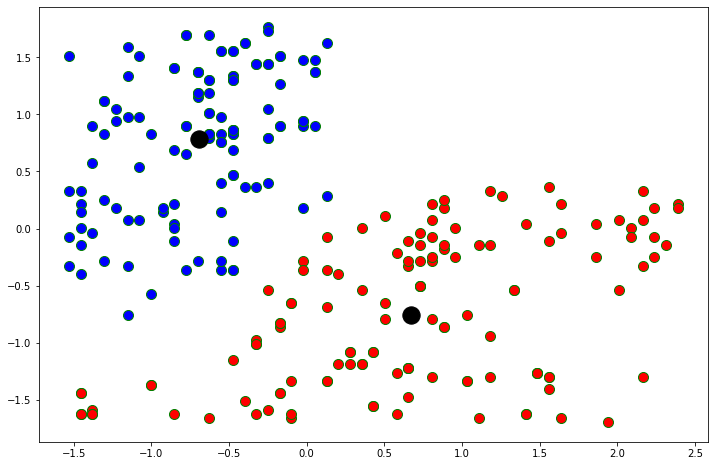

In [4]:
#code here
import scipy.stats as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df1 = df.fillna(method='ffill')

def remove_o(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    y = x[~((x<(Q1-(1.5*IQR))) | (x>(Q3+(1.5*IQR))))]
    return y

df1 = remove_o(df1[['Umur','Skor Belanja (1-100)']])
df1.dropna(axis=0, inplace=True)

df2 = StandardScaler().fit_transform(df1.astype(float))

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df2)
labels1 = kmeans1.labels_
labels1

df3 = pd.DataFrame(data=df2, columns=['Umur', 'Skor Belanja (1-100)'])
df3['label1_kmeans'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(df3['Umur'][df3.label1_kmeans == 0], df3['Skor Belanja (1-100)'][df3.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df3['Umur'][df3.label1_kmeans == 1], df3['Skor Belanja (1-100)'][df3.label1_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


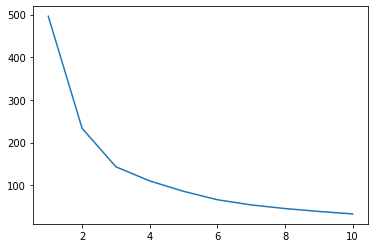

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.show()

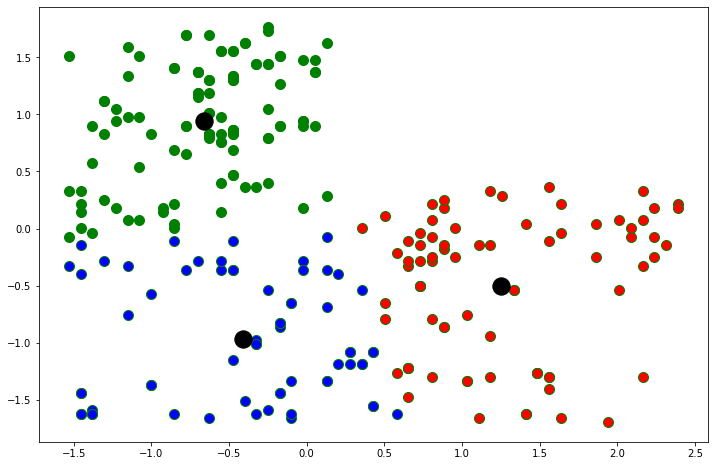

In [8]:
kmeans2 = KMeans(n_clusters = 3, random_state=42).fit(df2)
labels2 = kmeans2.labels_
labels2

df3['label2_kmeans'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(df3['Umur'][df3.label2_kmeans == 0], df3['Skor Belanja (1-100)'][df3.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df3['Umur'][df3.label2_kmeans == 1], df3['Skor Belanja (1-100)'][df3.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(df3['Umur'][df3.label2_kmeans == 2], df3['Skor Belanja (1-100)'][df3.label2_kmeans == 2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: